# Total sales prediction 

This notebook managed to predict the total sales for the next 28 days. We use a decision tree regression model and LSTM to predict the data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load and prepare data

In [2]:
# df = pd.read_csv('sales_total_month.csv')
df = pd.read_csv('sales_total.csv')
df

,date,CA_sales,TX_sales,WI_sales,total_sales
0,1/29/2011,36276.100,24100.451,21274.059,81650.610
1,1/30/2011,35047.460,23771.680,20151.430,78970.570
2,1/31/2011,25283.730,16609.832,15813.350,57706.914
3,2/1/2011,26917.002,17957.960,15886.240,60761.203
4,2/2/2011,25175.630,14455.859,7328.460,46959.953
...,...,...,...,...,...
1936,5/18/2016,51584.113,33051.070,31697.930,116333.120
1937,5/19/2016,53695.758,30074.180,33686.380,117456.310
1938,5/20/2016,56724.330,39795.890,37480.450,134000.670
1939,5/21/2016,76344.320,44046.800,42004.530,162395.660


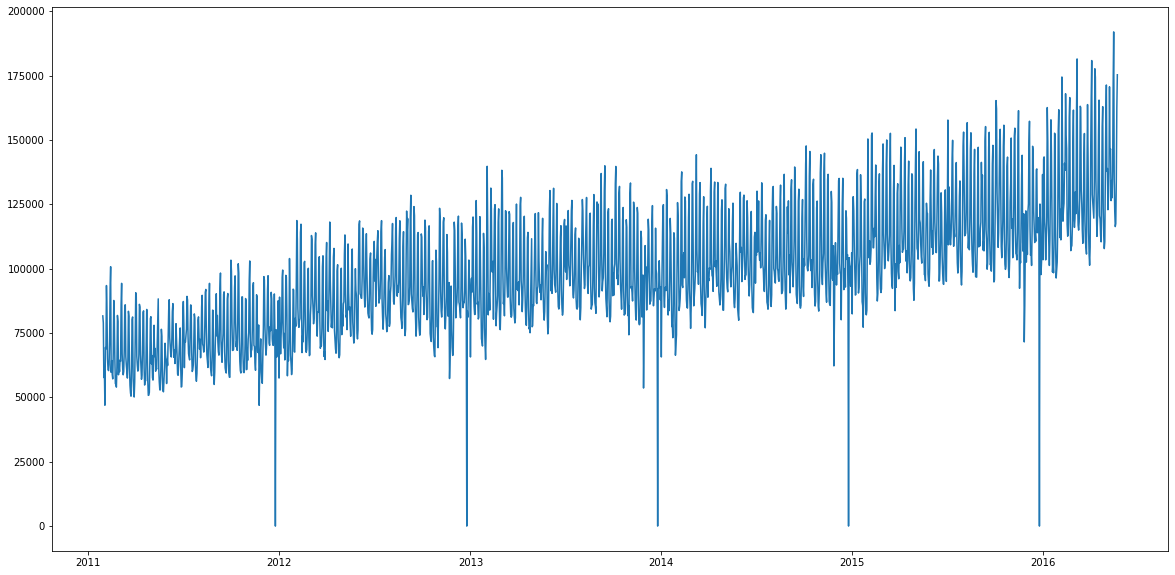

In [3]:
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(20,10))
plt.plot(df['date'],df['total_sales'])
plt.show()

In [4]:
predict_length = 28

df2 = df['total_sales'].reset_index().drop(columns='index')
df2['prediction'] = df['total_sales'].shift(-predict_length)
df2

,total_sales,prediction
0,81650.610,81839.49
1,78970.570,79451.25
2,57706.914,58794.66
3,60761.203,62540.18
4,46959.953,59996.54
...,...,...
1936,116333.120,NaN
1937,117456.310,NaN
1938,134000.670,NaN
1939,162395.660,NaN


In [5]:
X = np.array(df2['total_sales'][:-predict_length]).reshape(-1,1)
X.shape

(1913, 1)

In [6]:
Y = np.array(df2['prediction'][:-predict_length])
Y.shape

(1913,)

In [7]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

#### Part 1 Decision tree regression

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [9]:
# from sklearn.model_selection import GridSearchCV

# parameters_tree ={"splitter":["best","random"],
#             "max_depth" : [1,5,10],
#            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
#            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
#            "max_features":["auto","log2","sqrt",None],
#            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [10]:
tree = DecisionTreeRegressor()

In [11]:
#I think just max_depth=None is ok.

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state =10)

tree_best = DecisionTreeRegressor(max_depth=None)
tree_best.fit(x_train,y_train)

y_hat = tree_best.predict(X[-predict_length:])
y_valid = Y[-predict_length:]
r2_score(y_valid,y_hat)

0.9202243901650373

In [33]:
future = tree_best.predict(np.array(df2['total_sales'][-predict_length:]).reshape(-1,1))
future

array([122138.39 , 124365.24 , 114105.2  , 108708.26 , 142596.69 ,
       142459.72 , 145819.61 , 144249.34 , 144356.98 , 117396.2  ,
       136677.56 , 134196.83 , 163062.86 , 144849.75 , 130381.58 ,
       131299.83 , 127966.49 , 113354.28 , 144249.34 , 145819.61 ,
       180822.44 , 125213.8  , 116913.85 , 139221.55 , 118433.164,
       124223.234, 174438.7  , 162597.95 ])

In [13]:
import datetime

In [14]:
dates = pd.date_range('2016-04-25', periods=28, freq='D')
future_dates = pd.date_range('2016-05-22', periods=28, freq='D')
dates

DatetimeIndex(['2016-04-25', '2016-04-26', '2016-04-27', '2016-04-28',
               '2016-04-29', '2016-04-30', '2016-05-01', '2016-05-02',
               '2016-05-03', '2016-05-04', '2016-05-05', '2016-05-06',
               '2016-05-07', '2016-05-08', '2016-05-09', '2016-05-10',
               '2016-05-11', '2016-05-12', '2016-05-13', '2016-05-14',
               '2016-05-15', '2016-05-16', '2016-05-17', '2016-05-18',
               '2016-05-19', '2016-05-20', '2016-05-21', '2016-05-22'],
              dtype='datetime64[ns]', freq='D')

In [37]:
future.reshape(1,-1)

array([[122138.39 , 124365.24 , 114105.2  , 108708.26 , 142596.69 ,
        142459.72 , 145819.61 , 144249.34 , 144356.98 , 117396.2  ,
        136677.56 , 134196.83 , 163062.86 , 144849.75 , 130381.58 ,
        131299.83 , 127966.49 , 113354.28 , 144249.34 , 145819.61 ,
        180822.44 , 125213.8  , 116913.85 , 139221.55 , 118433.164,
        124223.234, 174438.7  , 162597.95 ]])

In [38]:
print(future_dates.shape,future.shape)

(28,) (28,)


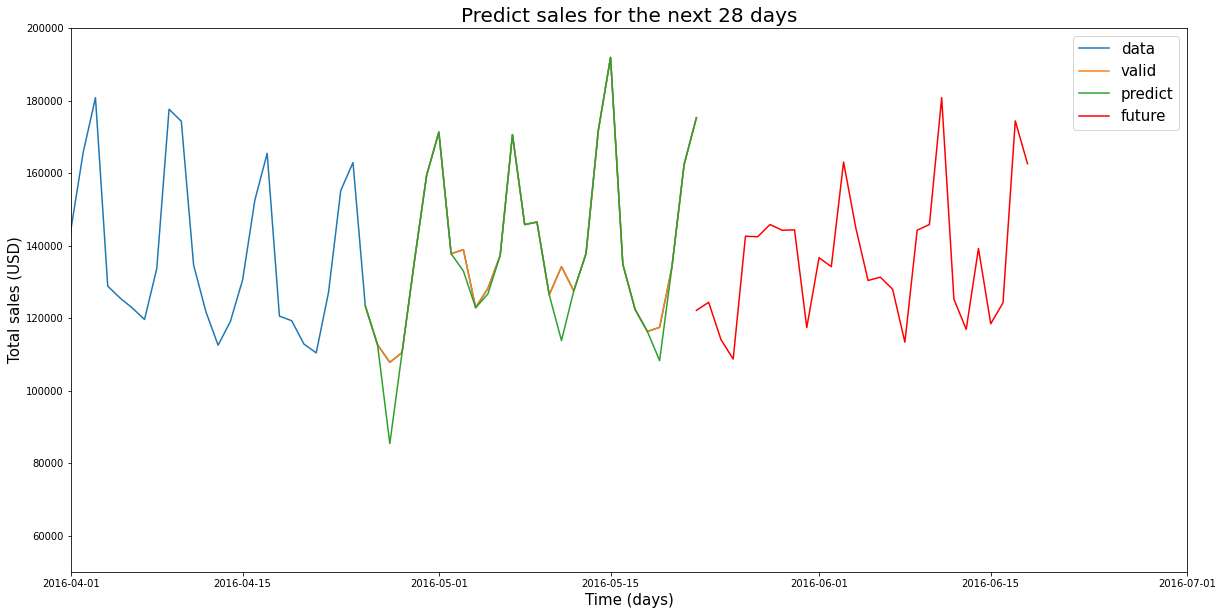

In [39]:
plt.figure(figsize=(20,10))
plt.plot(df['date'],df['total_sales'])
plt.plot(dates,y_valid)
plt.plot(dates,y_hat)
plt.plot(future_dates,future,'r-')
plt.legend(['data','valid','predict','future'],loc='best',fontsize=15)
plt.xlim([datetime.datetime(2016,4,1),datetime.datetime(2016,7,1)])
plt.ylim([50000,200000])
plt.ylabel('Total sales (USD)',fontsize=15)
plt.xlabel('Time (days)',fontsize=15)
plt.title('Predict sales for the next 28 days',fontsize=20)
plt.show()

#### Part 1.2 Decision tree regression with data in month unit

In [16]:
df_month = pd.read_csv('sales_total_month.csv')

28 days in month unit is 1 month. So, we predict 1 data point.

In [17]:
df_month['prediction'] = df_month['total_sales'].shift(-1)
# df_month

In [18]:
X_month = np.array(df_month['total_sales'][:-1]).reshape(-1,1)
Y_month = np.array(df_month['prediction'][:-1])
print(X_month.shape,Y_month.shape)

(64, 1) (64,)


In [19]:
x_month_train, x_month_test, y_month_train, y_month_test = train_test_split(X_month, Y_month, test_size = 0.2,random_state =10)

In [20]:
tree_month = DecisionTreeRegressor()

In [21]:
tree_month.fit(x_month_train,y_month_train)

y_hat_month = tree_month.predict([X_month[-1]])
y_valid_month = Y_month[-1:]

future = tree_month.predict([df_month['total_sales'][-1:]])

In [22]:
df_month['total_sales'][-1:]

64    3151716.2
Name: total_sales, dtype: float64

In [23]:
future

array([3288671.])

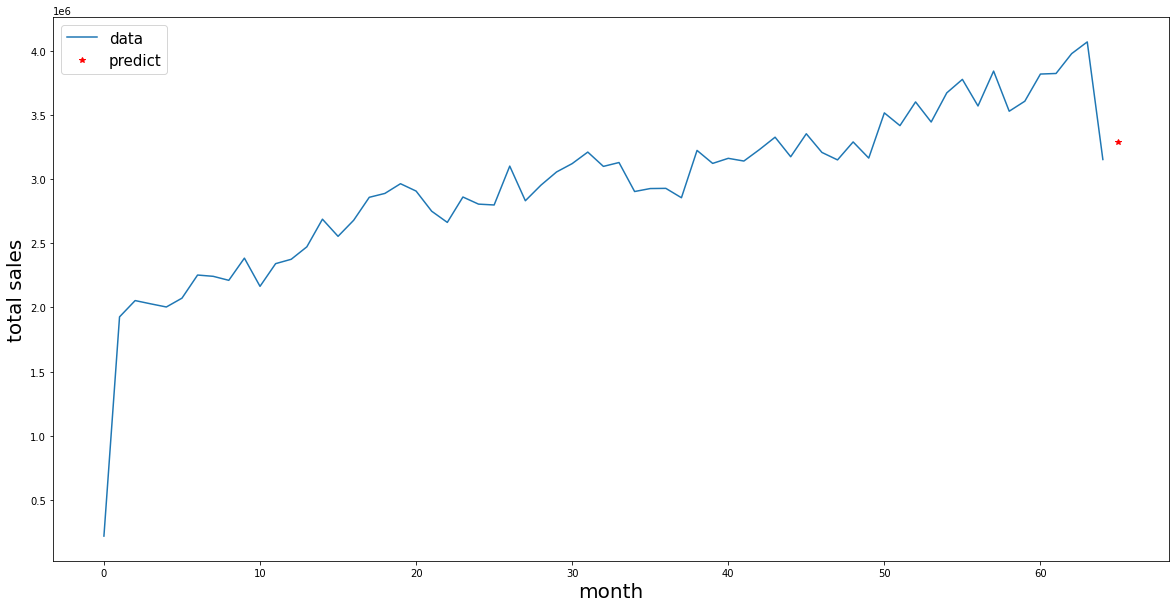

In [24]:
plt.figure(figsize=(20,10))
plt.plot(df_month['total_sales'])
plt.plot(65,future,'r*')
plt.legend(['data','predict'],loc=2,fontsize=15)
plt.xlabel('month',fontsize=20)
plt.ylabel('total sales',fontsize=20)
plt.show()